# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial.distance import pdist  
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn import svm
from sklearn.decomposition import PCA, IncrementalPCA
import datetime
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

%matplotlib inline
sns.set(color_codes=True)

# Part I

## Import and Warehouse data

### Importing the data

In [2]:
df1=pd.read_csv('Part1 - Car name.csv')

In [3]:
print('The size of the data:', df1.size)
print('No of rows in the data:', df1.shape[0])
print('No of columns in the data:', df1.shape[1])

The size of the data: 398
No of rows in the data: 398
No of columns in the data: 1


In [4]:
df2=pd.read_json('Part1 - Car-Attributes.json')

In [5]:
print('The size of the data:', df2.size)
print('No of rows in the data:', df2.shape[0])
print('No of columns in the data:', df2.shape[1])

The size of the data: 3184
No of rows in the data: 398
No of columns in the data: 8


### Merging the Data

In [6]:
df3=df1.join(df2,how='left')

In [7]:
df3.head(10)

car_name   acc  cyl   disp   hp   mpg  origin    wt  yr
0  chevrolet chevelle malibu  12.0    8  307.0  130  18.0       1  3504  70
1          buick skylark 320  11.5    8  350.0  165  15.0       1  3693  70
2         plymouth satellite  11.0    8  318.0  150  18.0       1  3436  70
3              amc rebel sst  12.0    8  304.0  150  16.0       1  3433  70
4                ford torino  10.5    8  302.0  140  17.0       1  3449  70
5           ford galaxie 500  10.0    8  429.0  198  15.0       1  4341  70
6           chevrolet impala   9.0    8  454.0  220  14.0       1  4354  70
7          plymouth fury iii   8.5    8  440.0  215  14.0       1  4312  70
8           pontiac catalina  10.0    8  455.0  225  14.0       1  4425  70
9         amc ambassador dpl   8.5    8  390.0  190  15.0       1  3850  70

In [8]:
print('The size of the data:', df3.size)
print('No of rows in the data:', df3.shape[0])
print('No of columns in the data:', df3.shape[1])

The size of the data: 3582
No of rows in the data: 398
No of columns in the data: 9


### Saving the data

In [9]:
df3.to_csv('Merge_data.csv')

### Importing the saved data

In [10]:
df=pd.read_csv('Merge_data.csv', index_col=0)

In [11]:
df.head(10)

car_name   acc  cyl   disp   hp   mpg  origin    wt  yr
0  chevrolet chevelle malibu  12.0    8  307.0  130  18.0       1  3504  70
1          buick skylark 320  11.5    8  350.0  165  15.0       1  3693  70
2         plymouth satellite  11.0    8  318.0  150  18.0       1  3436  70
3              amc rebel sst  12.0    8  304.0  150  16.0       1  3433  70
4                ford torino  10.5    8  302.0  140  17.0       1  3449  70
5           ford galaxie 500  10.0    8  429.0  198  15.0       1  4341  70
6           chevrolet impala   9.0    8  454.0  220  14.0       1  4354  70
7          plymouth fury iii   8.5    8  440.0  215  14.0       1  4312  70
8           pontiac catalina  10.0    8  455.0  225  14.0       1  4425  70
9         amc ambassador dpl   8.5    8  390.0  190  15.0       1  3850  70

In [12]:
print('The size of the data:', df.size)
print('No of rows in the data:', df.shape[0])
print('No of columns in the data:', df.shape[1])

The size of the data: 3582
No of rows in the data: 398
No of columns in the data: 9


## Data Cleansing

### Dropping car_names attribute

In [13]:
df2=df.copy(deep=True)

In [14]:
df2.drop(axis=1, columns='car_name', inplace=True)

In [15]:
df2.columns

Index(['acc', 'cyl', 'disp', 'hp', 'mpg', 'origin', 'wt', 'yr'], dtype='object')

### Checking for null values

#### Converting all values to numeric in case if there are any string values

In [16]:
df2 = df2.convert_objects(convert_numeric=True)

J:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [17]:
df2.isnull().sum()

acc       0
cyl       0
disp      0
hp        6
mpg       0
origin    0
wt        0
yr        0
dtype: int64

#### It seems that thre are six null values in 'hp' column

In [18]:
medianFiller = lambda x: x.fillna(x.median())
df2 = df2.apply(medianFiller,axis=0)


#### Replacing the null values with median data

In [19]:
df2.isnull().sum()

acc       0
cyl       0
disp      0
hp        0
mpg       0
origin    0
wt        0
yr        0
dtype: int64

#### No null values now

### Checking for zero values

In [20]:
(df2==0).all()

acc       False
cyl       False
disp      False
hp        False
mpg       False
origin    False
wt        False
yr        False
dtype: bool

#### None of the columns have zero values or entirely filled with zero 

### Checking correlation between attributes

In [21]:
correlation_values=df2.corr()['mpg']
correlation_values.abs().sort_values(ascending=False)

mpg       1.000000
wt        0.831741
disp      0.804203
cyl       0.775396
hp        0.773453
yr        0.579267
origin    0.563450
acc       0.420289
Name: mpg, dtype: float64

#### Assuming 'mpg' as the target variable we calculate the correlation of attributes with our target variable. It seems that 'acc', only acceleration has less correlation of < 0.5 with 'mpg' 

<AxesSubplot:title={'center':'Correlation of Attributes'}>

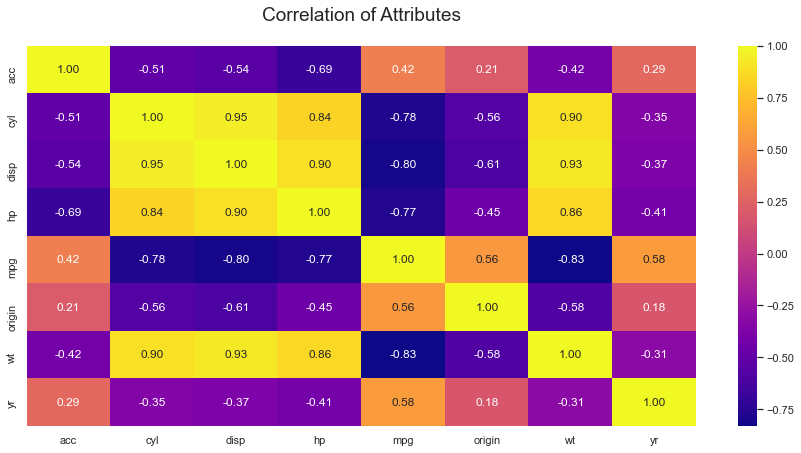

In [22]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df2.corr(), cmap='plasma',annot=True, fmt='.2f')

#### From the above plot the following can be inferred
- The correlation of 'acc' with all other attributes are less than 0.5
- The correlation of 'cyl'(cylinder) with 'disp' (displacement) and 'wt' (weight) is high
- The variable 'disp' is highly correlated to 'wt' (weight)
- The variable 'hp' (horsepower) is highly correlated with 'cyl','wt' and 'disp' attributes
#### Normally if we have many attributes or variables we would drop variables that have low correlation with other attributes, for example here, the acceleration variable has low correlation with other variables but since out data set is small, it is fine not to drop a column

### Scaling and Normalizaing the values

In [23]:
df_scaled=df2.apply(zscore)

## Data Analysis and visualization

### Checking the type of attributes

In [24]:
df_scaled.nunique()

acc        95
cyl         5
disp       82
hp         94
mpg       129
origin      3
wt        351
yr         13
dtype: int64

#### The attributes year, origin and cylinder are categorical while the rest are continuous

### Five point summary

In [25]:
df2.describe().T

count         mean         std     min       25%     50%       75%  \
acc     398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
cyl     398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp    398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
hp      398.0   104.304020   38.222625    46.0    76.000    93.5   125.000   
mpg     398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   
origin  398.0     1.572864    0.802055     1.0     1.000     1.0     2.000   
wt      398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
yr      398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   

           max  
acc       24.8  
cyl        8.0  
disp     455.0  
hp       230.0  
mpg       46.6  
origin     3.0  
wt      5140.0  
yr        82.0

In [26]:
five_point=df2.describe().T
five_point[['min','25%','50%','75%','max']]

min       25%     50%       75%     max
acc        8.0    13.825    15.5    17.175    24.8
cyl        3.0     4.000     4.0     8.000     8.0
disp      68.0   104.250   148.5   262.000   455.0
hp        46.0    76.000    93.5   125.000   230.0
mpg        9.0    17.500    23.0    29.000    46.6
origin     1.0     1.000     1.0     2.000     3.0
wt      1613.0  2223.750  2803.5  3608.000  5140.0
yr        70.0    73.000    76.0    79.000    82.0

#### There are no negative values or any other suspiciously looking values.

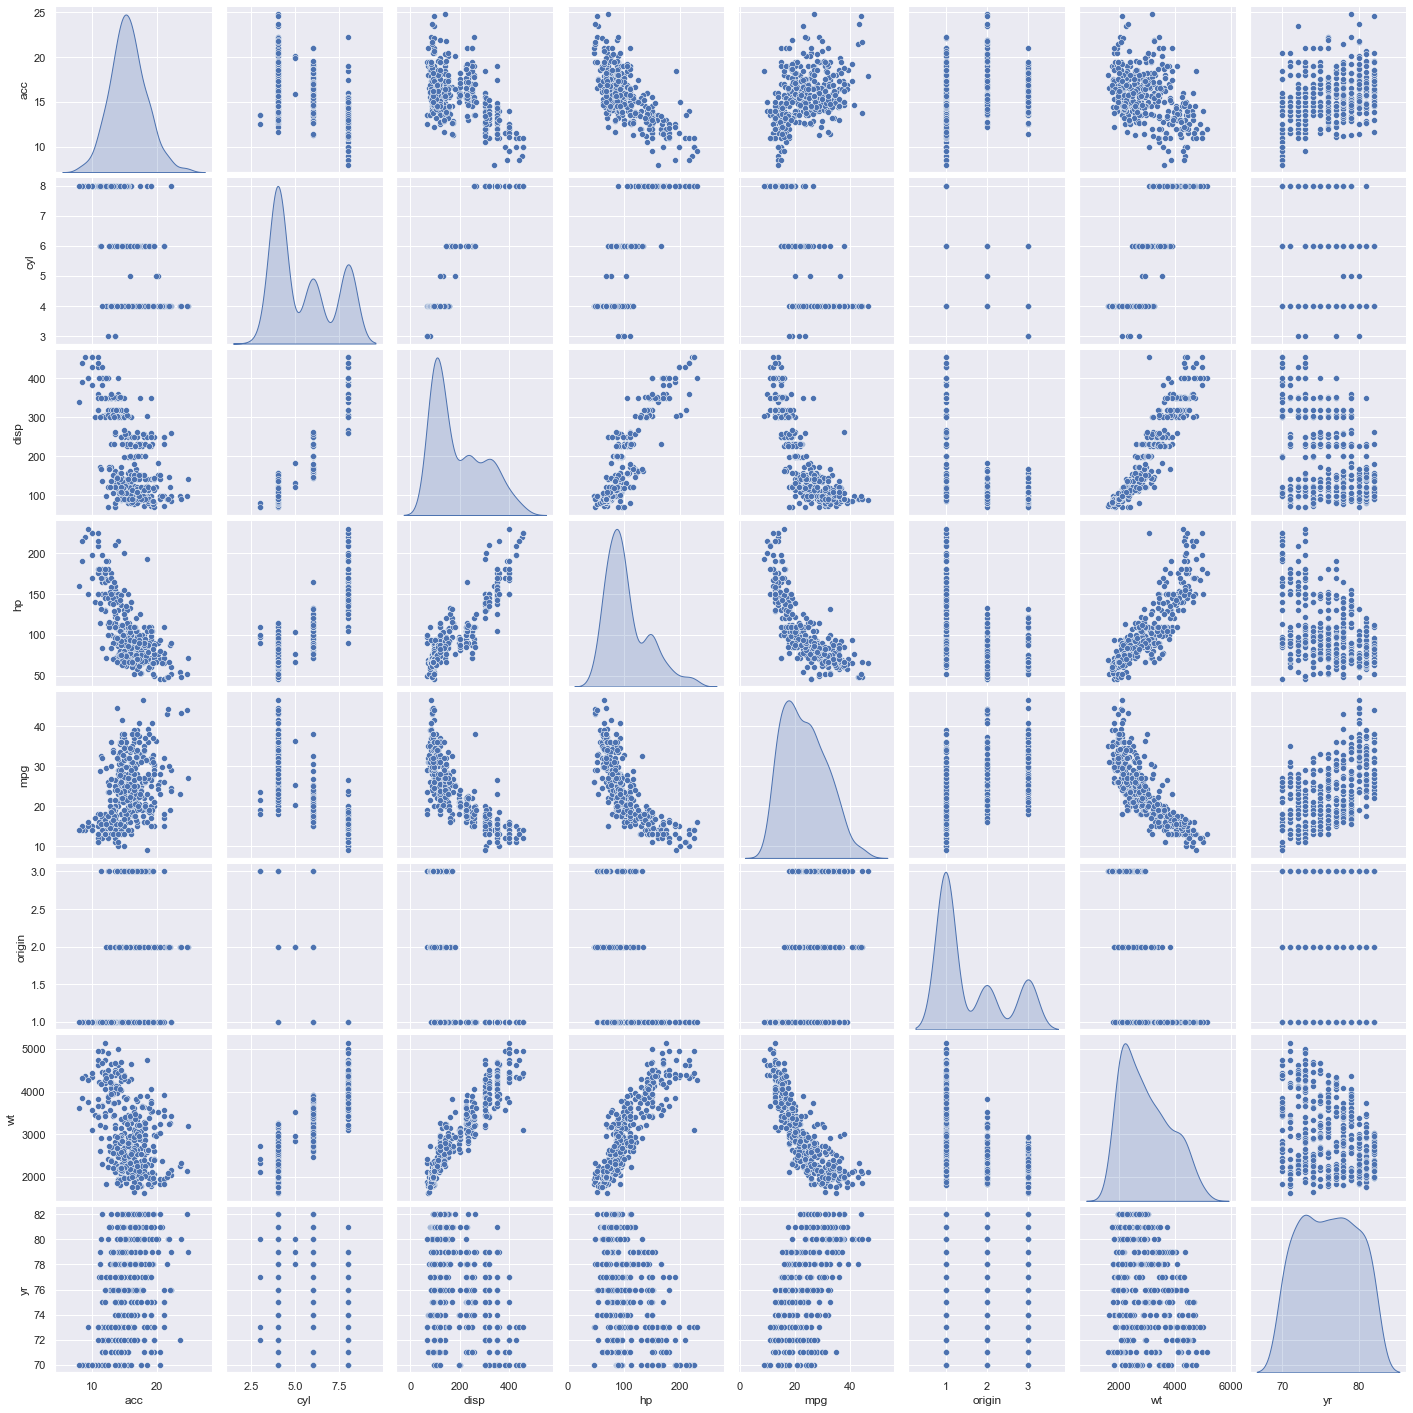

In [27]:
sns.pairplot(df2, diag_kind='kde')

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='origin', ylabel='count'>

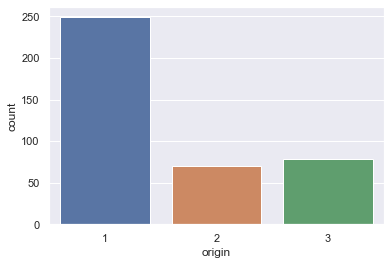

In [28]:
sns.countplot(df2['origin'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cyl', ylabel='count'>

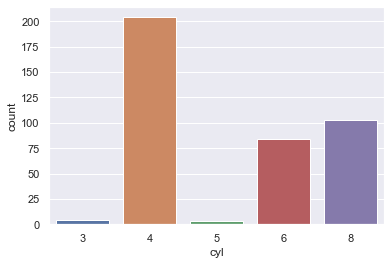

In [29]:
sns.countplot(df2['cyl'])

### Visualizing the distribution of  target variable 'mpg' using various plots

J:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

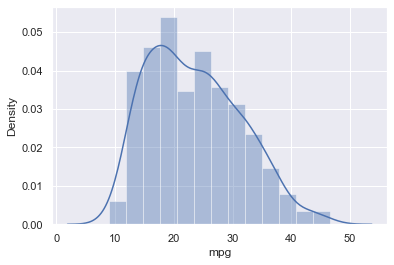

In [30]:
sns.distplot(df2['mpg'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mpg'>

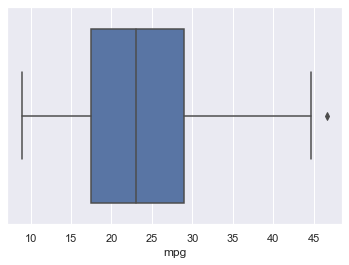

In [31]:
sns.boxplot(df2['mpg'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mpg', ylabel='wt'>

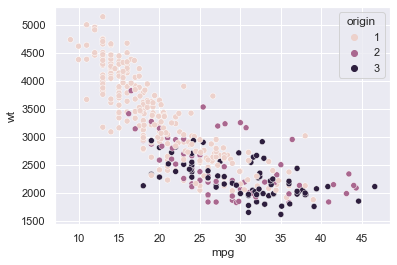

In [32]:
sns.scatterplot(df2['mpg'],df2['wt'], hue=df2['origin'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mpg', ylabel='wt'>

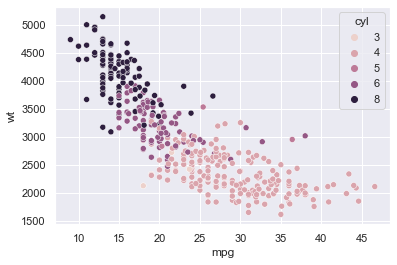

In [33]:
sns.scatterplot(df2['mpg'],df2['wt'], hue=df2['cyl'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
J:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='origin', ylabel='mpg'>

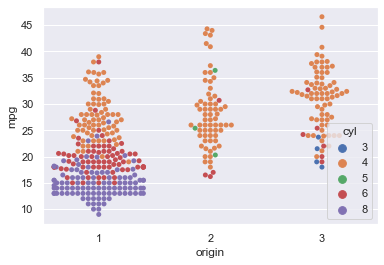

In [34]:
sns.swarmplot(df2['origin'],df2['mpg'], hue= df2['cyl'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


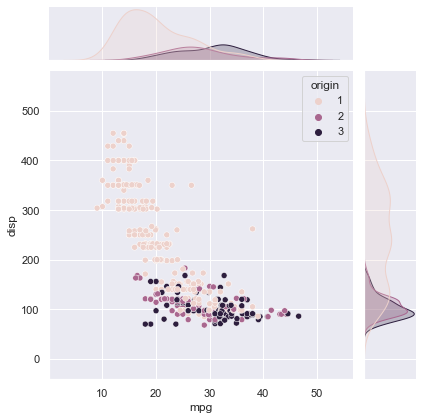

In [35]:
sns.jointplot(df2['mpg'],df2['disp'], hue=df2['origin'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


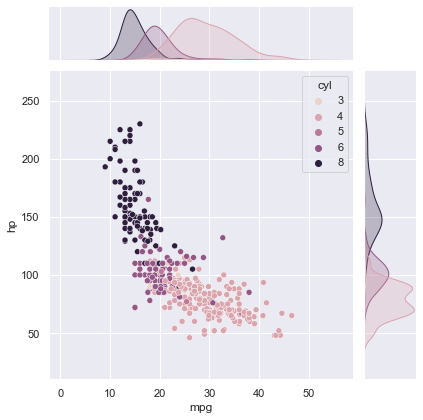

In [36]:
sns.jointplot(df2['mpg'],df2['hp'], hue=df2['cyl'])

## Machine Learning

In [37]:
df_scaled.isnull().sum()

acc       0
cyl       0
disp      0
hp        0
mpg       0
origin    0
wt        0
yr        0
dtype: int64

### K means clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

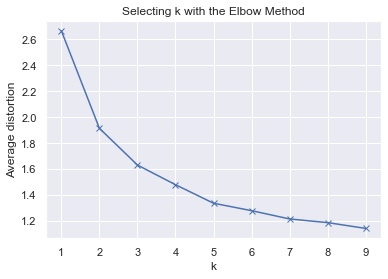

In [38]:
#Finding optimal no. of clusters

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


#### We could see a clear curve and cluster 3 seems to be the elbow point

In [39]:
t1=datetime.datetime.now()
final_model=KMeans(3)
final_model.fit(df_scaled)
prediction=final_model.predict(df_scaled)
t2=datetime.datetime.now()


In [40]:
print('Time taken for KMeans clustering to fit and predict:', t2-t1)

Time taken for KMeans clustering to fit and predict: 0:00:00.048029


In [41]:
df3=df.copy(deep =True)
df_scaled_Kmeans=df_scaled.copy(deep=True)


In [42]:
df3['GROUP']= prediction
df_scaled_Kmeans["GROUP"] = prediction
print("Groups Assigned : \n")
df3.head()

Groups Assigned : 



car_name   acc  cyl   disp   hp   mpg  origin    wt  yr  \
0  chevrolet chevelle malibu  12.0    8  307.0  130  18.0       1  3504  70   
1          buick skylark 320  11.5    8  350.0  165  15.0       1  3693  70   
2         plymouth satellite  11.0    8  318.0  150  18.0       1  3436  70   
3              amc rebel sst  12.0    8  304.0  150  16.0       1  3433  70   
4                ford torino  10.5    8  302.0  140  17.0       1  3449  70   

   GROUP  
0      2  
1      2  
2      2  
3      2  
4      2

In [43]:
df3Clust = df3.groupby(['GROUP'])
df3Clust.mean()

acc       cyl        disp       mpg    origin           wt  \
GROUP                                                                     
0      16.772263  5.240876  187.558394  21.69562  1.087591  2990.861314   
1      16.311801  4.068323  103.422360  30.52795  2.341615  2234.720497   
2      12.721000  7.980000  346.370000  14.71500  1.000000  4126.910000   

              yr  
GROUP             
0      76.313869  
1      77.155280  
2      73.750000

#### The mean values of the attributes of each group is given here

### Hierarchy Clustering

In [44]:
df4=df.copy(deep =True)
df_scaled_HClustering=df_scaled.copy(deep=True)


In [45]:
t3=datetime.datetime.now()
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(df_scaled_HClustering)
labels = model.labels_
t4=datetime.datetime.now()

In [46]:
print('The time taken for Hierarchy Clustering to fit and predict:', t4-t3)

The time taken for Hierarchy Clustering to fit and predict: 0:00:00.007000


In [47]:
df4['labels'] = labels
df4.head(10)

car_name   acc  cyl   disp   hp   mpg  origin    wt  yr  \
0  chevrolet chevelle malibu  12.0    8  307.0  130  18.0       1  3504  70   
1          buick skylark 320  11.5    8  350.0  165  15.0       1  3693  70   
2         plymouth satellite  11.0    8  318.0  150  18.0       1  3436  70   
3              amc rebel sst  12.0    8  304.0  150  16.0       1  3433  70   
4                ford torino  10.5    8  302.0  140  17.0       1  3449  70   
5           ford galaxie 500  10.0    8  429.0  198  15.0       1  4341  70   
6           chevrolet impala   9.0    8  454.0  220  14.0       1  4354  70   
7          plymouth fury iii   8.5    8  440.0  215  14.0       1  4312  70   
8           pontiac catalina  10.0    8  455.0  225  14.0       1  4425  70   
9         amc ambassador dpl   8.5    8  390.0  190  15.0       1  3850  70   

   labels  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

In [48]:
df4 = df4.groupby(['labels'])
df4.mean()

acc       cyl        disp        mpg    origin           wt  \
labels                                                                     
0       16.51422  4.059633  112.213303  29.053211  1.977064  2338.243119   
1       12.70200  7.980000  345.470000  14.684000  1.000000  4121.560000   
2       16.57250  6.100000  224.675000  19.460000  1.187500  3254.200000   

               yr  
labels             
0       77.192661  
1       73.740000  
2       75.625000

### Calculating Cophenet distances

In [49]:
Z_average = linkage(df_scaled_HClustering, metric='euclidean', method='average')
c, coph_dists = cophenet(Z_average , pdist(df_scaled_HClustering))

print(c)

0.7554096381782244


In [50]:
Z_complete = linkage(df_scaled_HClustering, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z_complete , pdist(df_scaled_HClustering))

print(c)

0.723784736927783


In [51]:
Z_ward = linkage(df_scaled_HClustering, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z_ward , pdist(df_scaled_HClustering))

print(c)

0.681505889742128


#### Form the above results, the linkage method using average distance yields highers cophenet distances around 0.75 which is closer to one.

#### On cmparing the results between Kmeans and Heirarchical clustering, the optimal number of clsuter is three and both the models yield a slightly similar results while looking at the mean of each groups produced by the models. Additionally it is surprising to note that Heirarchical took less time than Kmeans. 

## Linear Regression on the clusters

#### We are using the results generated by Heirarchical clustering

### The optimal number of clusters required for the above data is 3, it's probably because 3 clusters are enough to explain the distortion or variability among the data points

### Unscaled data

In [52]:
df5=df2.copy(deep= True)
df5.head()

acc  cyl   disp     hp   mpg  origin    wt  yr
0  12.0    8  307.0  130.0  18.0       1  3504  70
1  11.5    8  350.0  165.0  15.0       1  3693  70
2  11.0    8  318.0  150.0  18.0       1  3436  70
3  12.0    8  304.0  150.0  16.0       1  3433  70
4  10.5    8  302.0  140.0  17.0       1  3449  70

In [53]:
df5['labels'] = labels

In [54]:
df5.dtypes

acc       float64
cyl         int64
disp      float64
hp        float64
mpg       float64
origin      int64
wt          int64
yr          int64
labels      int64
dtype: object

In [55]:
dfg1=df5[df5['labels']==0]
dfg2=df5[df5['labels']==1]
dfg3=df5[df5['labels']==2]

In [56]:
dfg1.head()

acc  cyl   disp    hp   mpg  origin    wt  yr  labels
14  15.0    4  113.0  95.0  24.0       3  2372  70       0
18  14.5    4   97.0  88.0  27.0       3  2130  70       0
19  20.5    4   97.0  46.0  26.0       2  1835  70       0
20  17.5    4  110.0  87.0  25.0       2  2672  70       0
21  14.5    4  107.0  90.0  24.0       2  2430  70       0

In [57]:
dfg2.head()

acc  cyl   disp     hp   mpg  origin    wt  yr  labels
0  12.0    8  307.0  130.0  18.0       1  3504  70       1
1  11.5    8  350.0  165.0  15.0       1  3693  70       1
2  11.0    8  318.0  150.0  18.0       1  3436  70       1
3  12.0    8  304.0  150.0  16.0       1  3433  70       1
4  10.5    8  302.0  140.0  17.0       1  3449  70       1

In [58]:
dfg3.head()

acc  cyl   disp     hp   mpg  origin    wt  yr  labels
15  15.5    6  198.0   95.0  22.0       1  2833  70       2
16  15.5    6  199.0   97.0  18.0       1  2774  70       2
17  16.0    6  200.0   85.0  21.0       1  2587  70       2
24  15.0    6  199.0   90.0  21.0       1  2648  70       2
33  13.0    6  232.0  100.0  19.0       1  2634  71       2

In [59]:
xg1=dfg1.drop('mpg',axis=1)
yg1=dfg1[['mpg']]
xg2=dfg2.drop('mpg',axis=1)
yg2=dfg2[['mpg']]
xg3=dfg3.drop('mpg',axis=1)
yg3=dfg3[['mpg']]

In [60]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(xg1,yg1, test_size=0.30, random_state=1)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(xg2,yg2, test_size=0.30, random_state=1)
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(xg3,yg3, test_size=0.30, random_state=1)

In [61]:
regression_model = LinearRegression()

In [62]:

regression_model.fit(xtrain1, ytrain1)

print('In Sample score for group 1:', regression_model.score(xtrain1, ytrain1))
for idx, col_name in enumerate(xtrain1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))




In Sample score for group 1: 0.696011016227538
The coefficient for acc is 0.13718533315391054
The coefficient for cyl is 1.6138363791873884
The coefficient for disp is 0.0105177817039142
The coefficient for hp is -0.06988699515743245
The coefficient for origin is 0.9312062072832906
The coefficient for wt is -0.008213875583063504
The coefficient for yr is 0.900182428736993
The coefficient for labels is 0.0


In [63]:
regression_model.fit(xtrain2, ytrain2)
print('In sample score for group 2 :', regression_model.score(xtrain2, ytrain2))
for idx, col_name in enumerate(xtrain2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In sample score for group 2 : 0.601512483595422
The coefficient for acc is -0.44431844518612706
The coefficient for cyl is -0.04330650353225171
The coefficient for disp is -0.0029885506255024766
The coefficient for hp is -0.021000267245216968
The coefficient for origin is -1.942890293094024e-16
The coefficient for wt is -0.0015318393854526515
The coefficient for yr is 0.44174298195603956
The coefficient for labels is 0.0


In [64]:
regression_model.fit(xtrain3, ytrain3)
print('In sample score for group 3 :' ,regression_model.score(xtrain3, ytrain3))
for idx, col_name in enumerate(xtrain3.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In sample score for group 3 : 0.5047385671397949
The coefficient for acc is -0.18364507005699132
The coefficient for cyl is 2.4931674803043817
The coefficient for disp is 0.004386197274227887
The coefficient for hp is -0.01511426807386264
The coefficient for origin is 0.09430908648016015
The coefficient for wt is -0.0041845854185737765
The coefficient for yr is 0.3693200975452199
The coefficient for labels is 0.0


### Scaled Data

In [65]:
df_scaled_HClustering['labels']=labels

In [66]:
df_scaled_HClustering.head()

acc       cyl      disp        hp       mpg    origin        wt  \
0 -1.295498  1.498191  1.090604  0.673118 -0.706439 -0.715145  0.630870   
1 -1.477038  1.498191  1.503514  1.589958 -1.090751 -0.715145  0.854333   
2 -1.658577  1.498191  1.196232  1.197027 -0.706439 -0.715145  0.550470   
3 -1.295498  1.498191  1.061796  1.197027 -0.962647 -0.715145  0.546923   
4 -1.840117  1.498191  1.042591  0.935072 -0.834543 -0.715145  0.565841   

         yr  labels  
0 -1.627426       1  
1 -1.627426       1  
2 -1.627426       1  
3 -1.627426       1  
4 -1.627426       1

In [67]:
dfg1=df_scaled_HClustering[df_scaled_HClustering['labels']==0]
dfg2=df_scaled_HClustering[df_scaled_HClustering['labels']==1]
dfg3=df_scaled_HClustering[df_scaled_HClustering['labels']==2]

In [68]:
dfg1.head()

acc       cyl      disp        hp       mpg    origin        wt  \
14 -0.206262 -0.856321 -0.772295 -0.243723  0.062185  1.781589 -0.707544   
18 -0.387801 -0.856321 -0.925936 -0.427091  0.446497  1.781589 -0.993671   
19  1.790672 -0.856321 -0.925936 -1.527300  0.318393  0.533222 -1.342463   
20  0.701436 -0.856321 -0.801103 -0.453287  0.190289  0.533222 -0.352841   
21 -0.387801 -0.856321 -0.829911 -0.374700  0.062185  0.533222 -0.638968   

          yr  labels  
14 -1.627426       0  
18 -1.627426       0  
19 -1.627426       0  
20 -1.627426       0  
21 -1.627426       0

In [69]:
dfg2.head()

acc       cyl      disp        hp       mpg    origin        wt  \
0 -1.295498  1.498191  1.090604  0.673118 -0.706439 -0.715145  0.630870   
1 -1.477038  1.498191  1.503514  1.589958 -1.090751 -0.715145  0.854333   
2 -1.658577  1.498191  1.196232  1.197027 -0.706439 -0.715145  0.550470   
3 -1.295498  1.498191  1.061796  1.197027 -0.962647 -0.715145  0.546923   
4 -1.840117  1.498191  1.042591  0.935072 -0.834543 -0.715145  0.565841   

         yr  labels  
0 -1.627426       1  
1 -1.627426       1  
2 -1.627426       1  
3 -1.627426       1  
4 -1.627426       1

In [70]:
dfg3.head()

acc       cyl      disp        hp       mpg    origin        wt  \
15 -0.024722  0.320935  0.043923 -0.243723 -0.194023 -0.715145 -0.162483   
16 -0.024722  0.320935  0.053526 -0.191332 -0.706439 -0.715145 -0.232242   
17  0.156817  0.320935  0.063128 -0.505677 -0.322127 -0.715145 -0.453340   
24 -0.206262  0.320935  0.053526 -0.374700 -0.322127 -0.715145 -0.381217   
33 -0.932419  0.320935  0.370411 -0.112746 -0.578335 -0.715145 -0.397770   

          yr  labels  
15 -1.627426       2  
16 -1.627426       2  
17 -1.627426       2  
24 -1.627426       2  
33 -1.356642       2

In [71]:
xg1=dfg1.drop('mpg',axis=1)
yg1=dfg1[['mpg']]
xg2=dfg2.drop('mpg',axis=1)
yg2=dfg2[['mpg']]
xg3=dfg3.drop('mpg',axis=1)
yg3=dfg3[['mpg']]

In [72]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(xg1,yg1, test_size=0.30, random_state=1)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(xg2,yg2, test_size=0.30, random_state=1)
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(xg3,yg3, test_size=0.30, random_state=1)

In [73]:
regression_model = LinearRegression()

In [74]:

regression_model.fit(xtrain1, ytrain1)

print('In Sample score for group 1:', regression_model.score(xtrain1, ytrain1))
for idx, col_name in enumerate(xtrain1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))




In Sample score for group 1: 0.6960110162275379
The coefficient for acc is 0.048402665543098265
The coefficient for cyl is 0.35122160193777663
The coefficient for disp is 0.1403134080532924
The coefficient for hp is -0.34176941665136024
The coefficient for origin is 0.09555782750486137
The coefficient for wt is -0.8899522687903227
The coefficient for yr is 0.4258630010384092
The coefficient for labels is 0.0


In [75]:
regression_model.fit(xtrain2, ytrain2)
print('In sample score for group 2 :', regression_model.score(xtrain2, ytrain2))
for idx, col_name in enumerate(xtrain2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In sample score for group 2 : 0.6015124835954218
The coefficient for acc is -0.15676746633580768
The coefficient for cyl is -0.009424858517926776
The coefficient for disp is -0.03986902706374528
The coefficient for hp is -0.10269792068972408
The coefficient for origin is 1.0363014685857046e-32
The coefficient for wt is -0.16597085294510167
The coefficient for yr is 0.20898207516380965
The coefficient for labels is 0.0


In [76]:
regression_model.fit(xtrain3, ytrain3)
print('In sample score for group 3 :' ,regression_model.score(xtrain3, ytrain3))
for idx, col_name in enumerate(xtrain3.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In sample score for group 3 : 0.5047385671397949
The coefficient for acc is -0.06479490700825652
The coefficient for cyl is 0.5425917321138738
The coefficient for disp is 0.05851445725593134
The coefficient for hp is -0.07391353099502873
The coefficient for origin is 0.009677739847012902
The coefficient for wt is -0.4533890548433913
The coefficient for yr is 0.1747198790639337
The coefficient for labels is 0.0


### Inference

#### While applying linear regression on the whole data, there seems to be an increase in the In sample score due to number of data points available, this is not the same while  applying linear reagression amopng clusters. But one advantage is that since the whole data is split into three clusters we can concentrate on the cluster we want rather than manually looking for a specified group of cars in the whole dataset

## Improvement

#### More number of attributes can be added to the dataset, even if the dimension increases we can use PCA. The number of attributes and data points collected should increase distortion in the dataset which will be useful to further group the data into more clusters

# Part II

## Importing Data, preprocessing and EDA

In [77]:
df=pd.read_excel('Part2 - Company.xlsx')

In [78]:
df.head()

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

In [79]:
print('The size of the data:', df.size)
print('No of rows in the data:', df.shape[0])
print('No of columns in the data:', df.shape[1])

The size of the data: 305
No of rows in the data: 61
No of columns in the data: 5


In [80]:
df2=df[['A','B','C','D']]

In [81]:
df2.head()

A    B    C    D
0   47   27   45  108
1  174  133  134  166
2  159  163  135  131
3   61   23    3   44
4   59   60    9   68

In [82]:
df2 = df2.convert_objects(convert_numeric=True)

J:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [83]:
df2.isnull().sum()

A    0
B    0
C    0
D    0
dtype: int64

### Correlation Table 

<AxesSubplot:title={'center':'Correlation of Attributes'}>

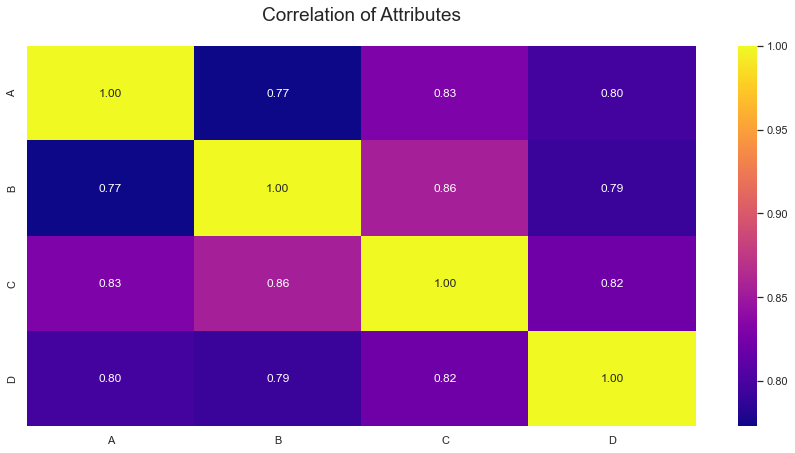

In [84]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df2.corr(), cmap='plasma',annot=True, fmt='.2f')

In [85]:
df2.nunique()

A    54
B    53
C    50
D    54
dtype: int64

#### All the variables are continuous while the target variable is categorical with only two values


### Five point Summary

In [86]:
five_point=df2.describe().T
five_point[['min','25%','50%','75%','max']]

min   25%    50%    75%    max
A  3.0  61.0  136.0  171.0  200.0
B  5.0  63.0  138.0  168.0  200.0
C  3.0  59.0  135.0  174.0  200.0
D  3.0  51.0  132.0  174.0  199.0

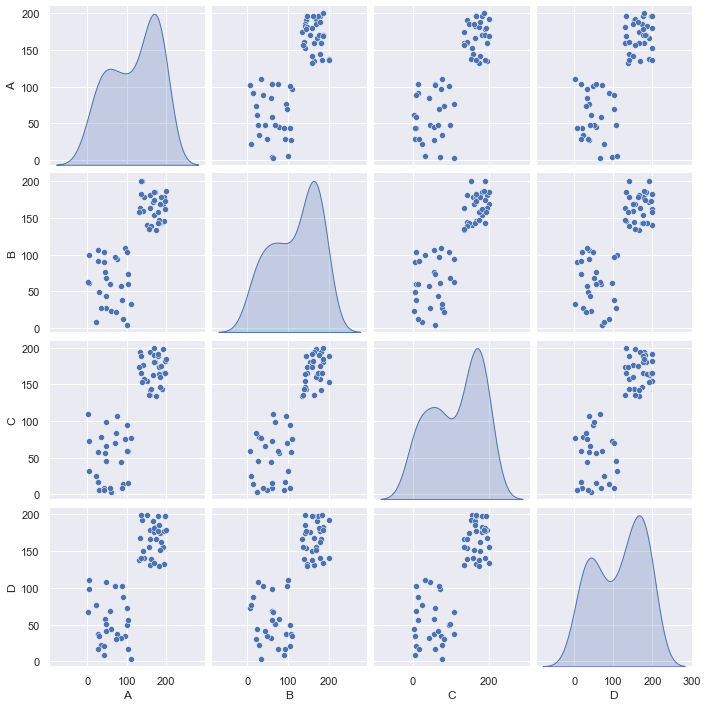

In [87]:
sns.pairplot(df2, diag_kind='kde')

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


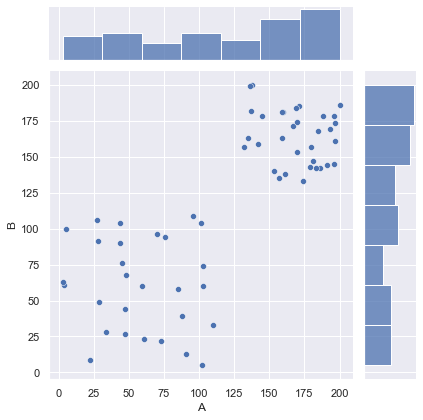

In [88]:
sns.jointplot(df['A'],df['B'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


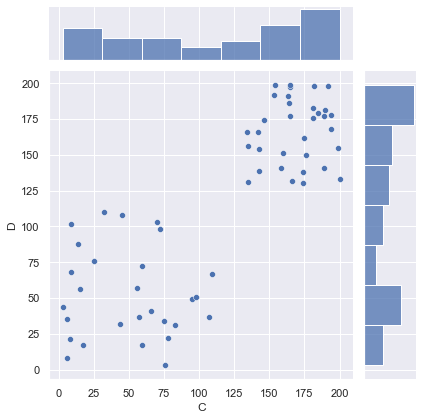

In [89]:
sns.jointplot(df['C'],df['D'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='A'>

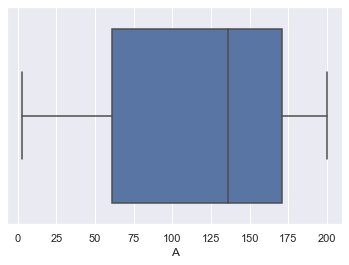

In [90]:
sns.boxplot(df['A'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='C'>

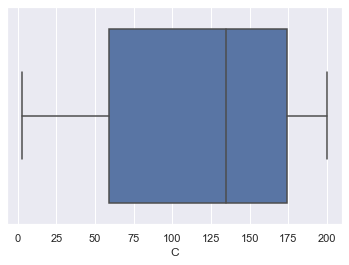

In [91]:
sns.boxplot(df['C'])

## Using Impute function for generating the missing values

In [92]:
imp = SimpleImputer(strategy="most_frequent")

In [93]:
df3= imp.fit_transform(df)

In [94]:
pd.DataFrame(df3).to_csv("Imputeddata.csv", index= None) 

In [95]:
df2=pd.read_csv('Imputeddata.csv' )

In [96]:
df2.head()

0    1    2    3          4
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131  Quality A
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

In [97]:
df2.columns=df.columns

In [98]:
df2.head()

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131  Quality A
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

In [99]:
df.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [100]:
df2.isnull().sum()

A          0
B          0
C          0
D          0
Quality    0
dtype: int64

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Quality', ylabel='count'>

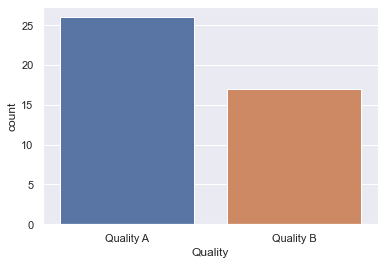

In [101]:
sns.countplot(df['Quality'])

### Similarly even if the company collects more data with missing values we can use this function to sysnthetically generate the missing values

# Part III

## Import and preprocess the data

In [102]:
df=pd.read_csv('Part3 - vehicle.csv')

In [103]:
print('The size of the data:', df.size)
print('No of rows in the data:', df.shape[0])
print('No of columns in the data:', df.shape[1])

The size of the data: 16074
No of rows in the data: 846
No of columns in the data: 19


In [104]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [105]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [106]:
x=df.drop('class',axis=1)
y=df[['class']]

In [107]:
x.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [108]:
y.head()

class
0   van
1   van
2   car
3   van
4   bus

### Checking for non-numerical values, removing them and filling the missing values with median values

In [109]:
x = x.convert_objects(convert_numeric=True)

J:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [110]:
x.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

In [111]:
medianFiller = lambda x: x.fillna(x.median())
x = x.apply(medianFiller,axis=0)

In [112]:
x.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [113]:
y.isnull().sum()

class    0
dtype: int64

In [114]:
(x==0).all()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
dtype: bool

In [115]:
(y==0).all()

class    False
dtype: bool

In [116]:
df=y.join(x,how='left')

In [117]:
df.head()

class  compactness  circularity  distance_circularity  radius_ratio  \
0   van           95         48.0                  83.0         178.0   
1   van           91         41.0                  84.0         141.0   
2   car          104         50.0                 106.0         209.0   
3   van           93         41.0                  82.0         159.0   
4   bus           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [118]:
df.nunique()

class                            3
compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              423
scaled_radius_of_gyration      144
scaled_radius_of_gyration.1     40
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
dtype: int64

#### Almost all the attributes are continuous

## EDA

### Correlation Table

<AxesSubplot:title={'center':'Correlation of Attributes'}>

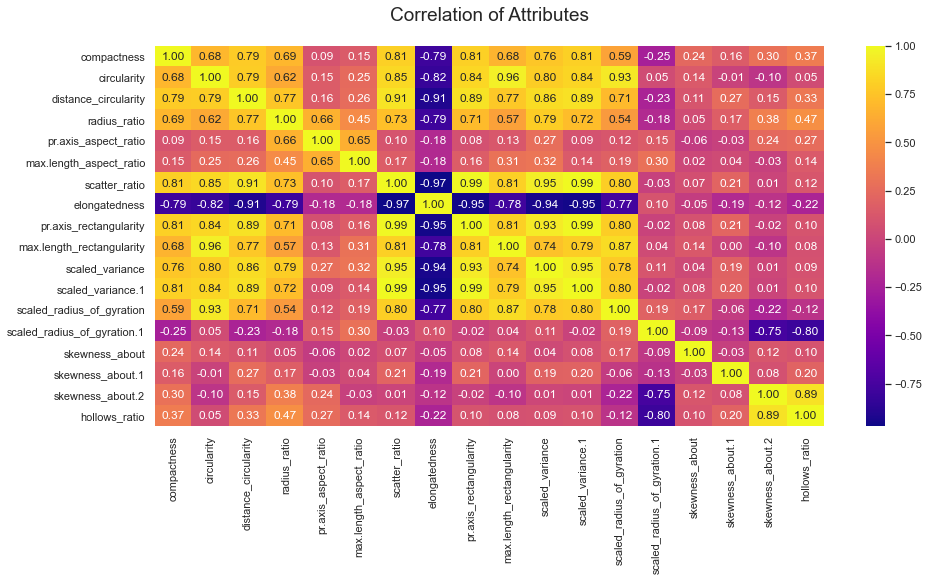

In [119]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(x.corr(), cmap='plasma',annot=True, fmt='.2f')

#### From the correlation table the attributes from 'compactness' to 'scaled_radius_of_gyration.1' have strong correlation with other values 

In [120]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

### Five point Summary

In [121]:
five_point=x.describe().T
five_point[['min','25%','50%','75%','max']]

min     25%    50%     75%     max
compactness                   73.0   87.00   93.0  100.00   119.0
circularity                   33.0   40.00   44.0   49.00    59.0
distance_circularity          40.0   70.00   80.0   98.00   112.0
radius_ratio                 104.0  141.00  167.0  195.00   333.0
pr.axis_aspect_ratio          47.0   57.00   61.0   65.00   138.0
max.length_aspect_ratio        2.0    7.00    8.0   10.00    55.0
scatter_ratio                112.0  147.00  157.0  198.00   265.0
elongatedness                 26.0   33.00   43.0   46.00    61.0
pr.axis_rectangularity        17.0   19.00   20.0   23.00    29.0
max.length_rectangularity    118.0  137.00  146.0  159.00   188.0
scaled_variance              130.0  167.00  179.0  217.00   320.0
scaled_variance.1            184.0  318.25  363.5  586.75  1018.0
scaled_radius_of_gyration    109.0  149.00  173.5  198.00   268.0
scaled_radius_of_gyration.1   59.0   67.00   71.5   75.00   135.0
skewness_about                 0.0    2.00    6.0    9.00    22.0
skewness_about.1               0.0    5.00   11.0   19.00    41.0
skewness_about.2             176.0  184.00  188.0  193.00   206.0
hollows_ratio                181.0  190.25  197.0  201.00   211.0

### Visualization

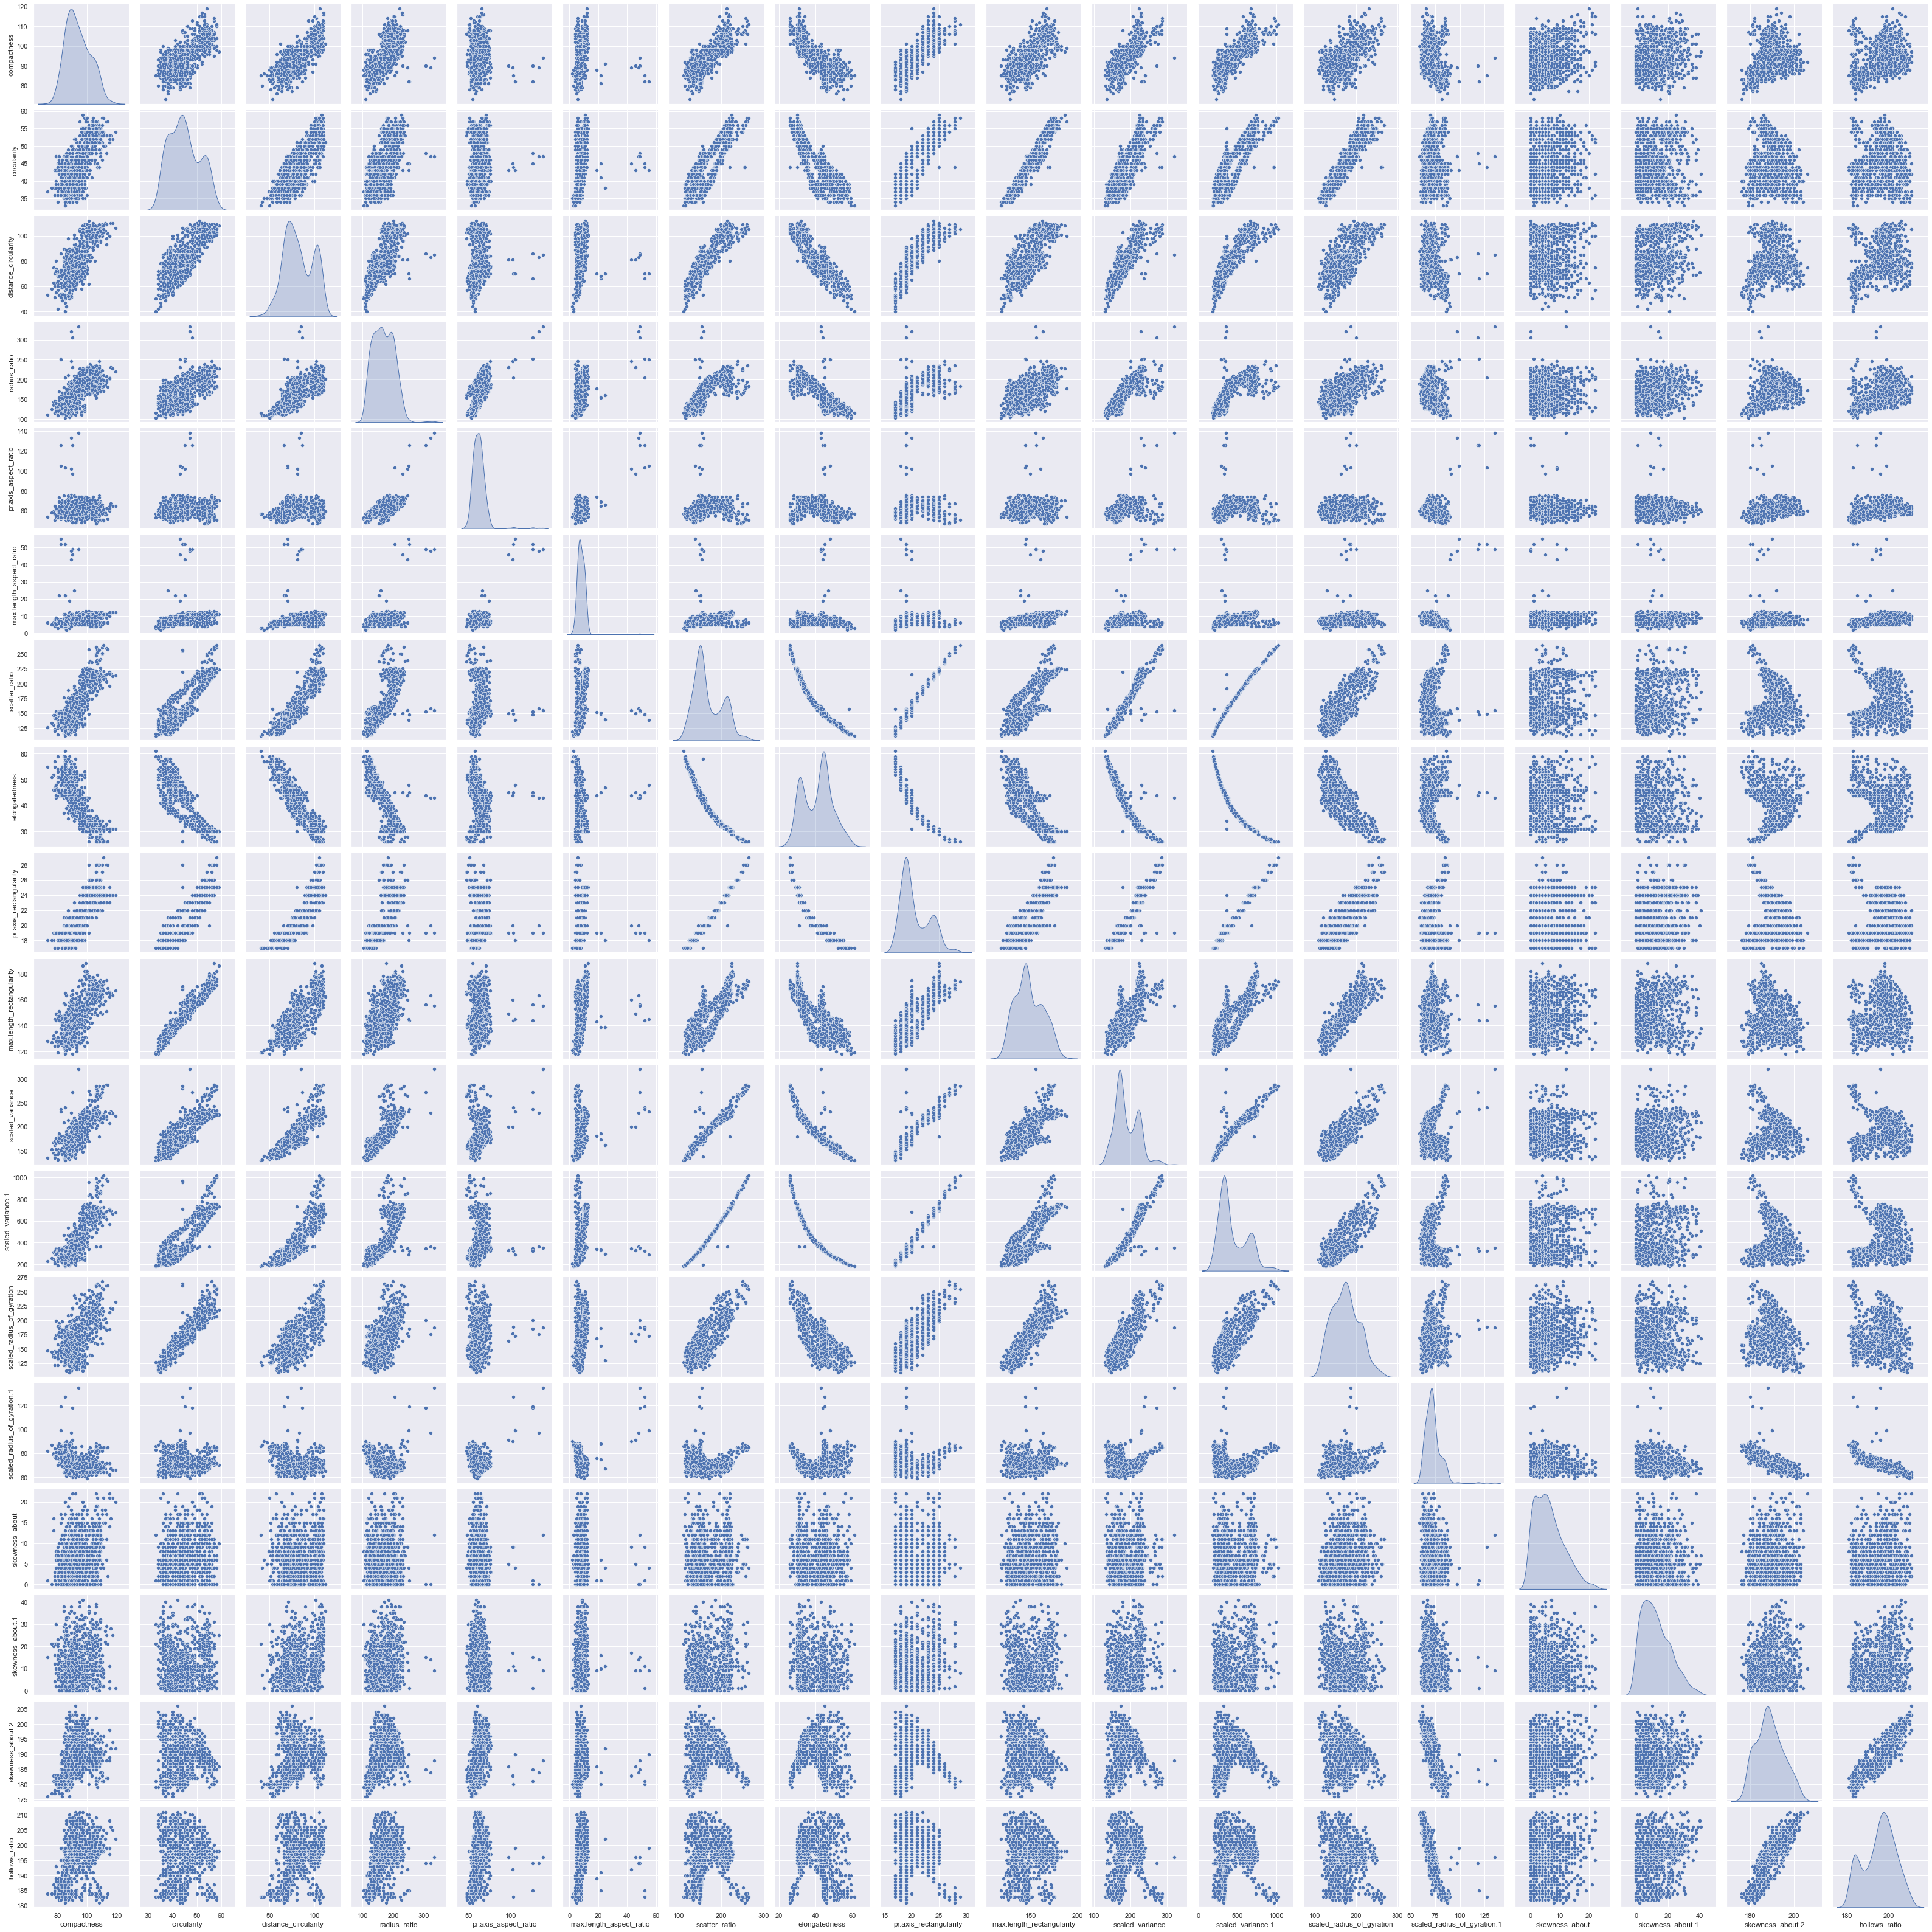

In [122]:
sns.pairplot(df, diag_kind='kde')

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

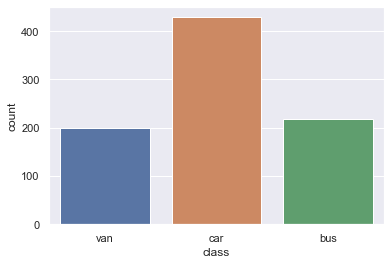

In [123]:
sns.countplot(df['class'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


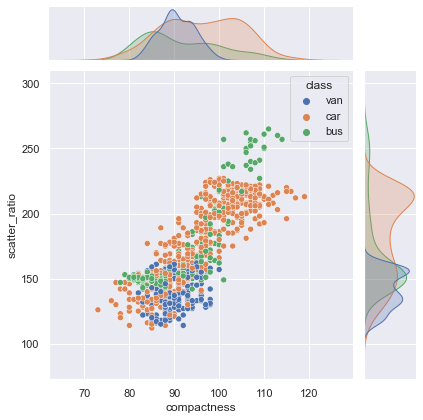

In [124]:
sns.jointplot(df['compactness'],df['scatter_ratio'], hue= df['class'])

J:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compactness', ylabel='Density'>

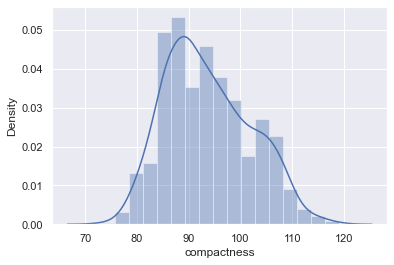

In [125]:
sns.distplot(df['compactness'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pr.axis_rectangularity', ylabel='circularity'>

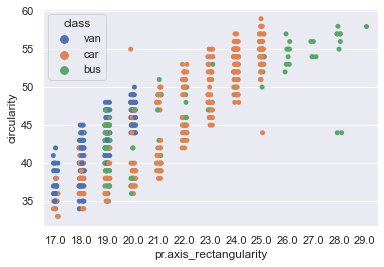

In [126]:
sns.stripplot(df['pr.axis_rectangularity'], df['circularity'], hue=df['class'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='max.length_aspect_ratio', ylabel='hollows_ratio'>

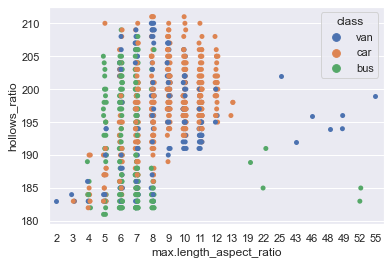

In [127]:
sns.stripplot(df['max.length_aspect_ratio'], df['hollows_ratio'], hue=df['class'])

### Normalizing and Scaling the data

## SVM without PCA

In [128]:
x_scaled=x.apply(zscore)

In [129]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled,y, test_size=0.30, random_state=1)

In [130]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x]== predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [131]:
clf = svm.SVC(gamma=0.025, C=3)    

In [132]:
t1=datetime.datetime.now()
clf.fit(xtrain , ytrain)
y_pred = clf.predict(xtest)
t2=datetime.datetime.now()

J:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [133]:
print('Time Taken:', t2-t1)

Time Taken: 0:00:00.019029


In [134]:
ytest2=ytest.to_numpy()
np.resize(ytest2,(254,))

array(['van', 'bus', 'bus', 'bus', 'car', 'car', 'van', 'van', 'van',
       'van', 'van', 'van', 'bus', 'car', 'bus', 'car', 'van', 'car',
       'car', 'bus', 'car', 'car', 'car', 'car', 'van', 'van', 'bus',
       'car', 'car', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
       'bus', 'car', 'bus', 'bus', 'car', 'van', 'van', 'car', 'van',
       'van', 'car', 'car', 'car', 'car', 'car', 'car', 'bus', 'car',
       'car', 'van', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
       'van', 'bus', 'car', 'car', 'car', 'car', 'bus', 'car', 'van',
       'car', 'van', 'bus', 'car', 'car', 'car', 'van', 'car', 'car',
       'van', 'car', 'car', 'bus', 'car', 'van', 'car', 'bus', 'bus',
       'car', 'bus', 'van', 'car', 'van', 'van', 'bus', 'bus', 'bus',
       'car', 'car', 'car', 'van', 'van', 'van', 'car', 'car', 'car',
       'car', 'car', 'car', 'bus', 'car', 'car', 'car', 'van', 'car',
       'van', 'van', 'car', 'car', 'van', 'van', 'car', 'car', 'car',
       'van', 'car',

In [135]:
print('Accuracy :', getAccuracy(ytest2 , y_pred))

Accuracy : 95.66929133858267


In [136]:
#x_scaled=x.apply(zscore)

## Applying PCA

In [137]:
covMatrix = np.cov(x_scaled,rowvar=False)
#print(covMatrix)

In [138]:
pca = PCA(n_components=18)
pca.fit(x_scaled)

PCA(n_components=18)

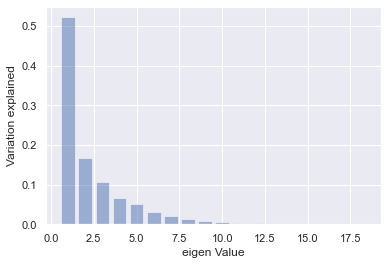

In [139]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

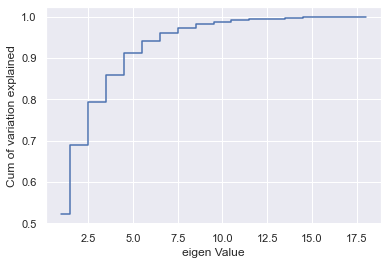

In [140]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### From the graph we can understand that eigen value of 10 explains almost 100% of the variation 

In [141]:
pca3 = PCA(n_components=10)
pca3.fit(x_scaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
xpca = pca3.transform(x_scaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

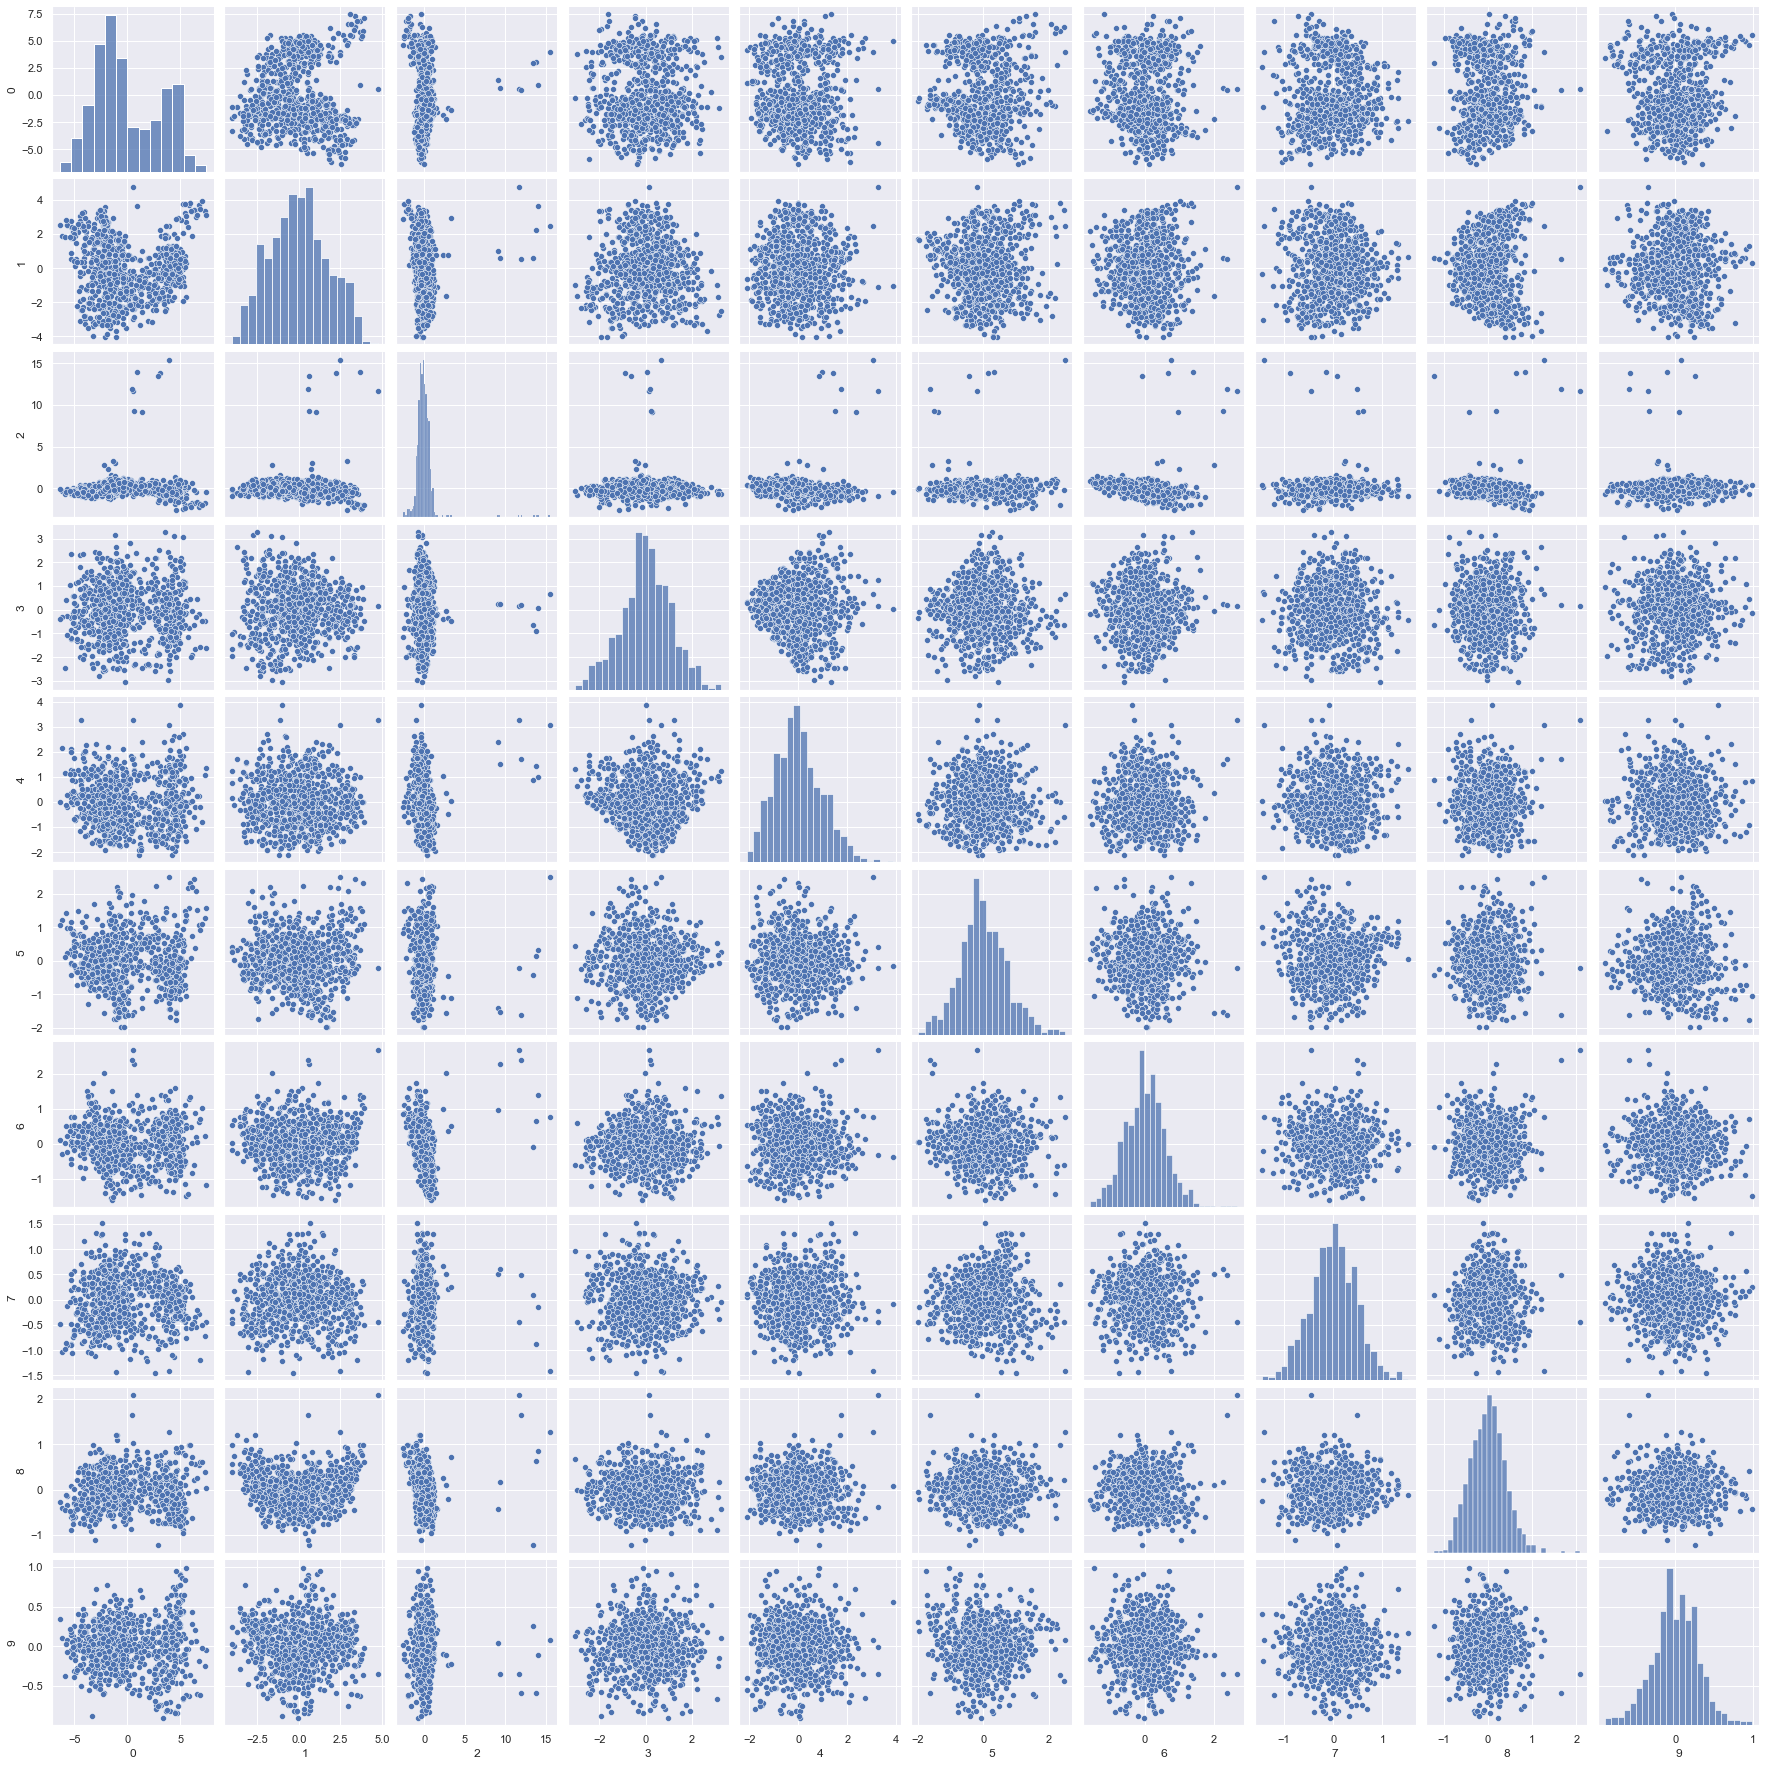

In [142]:
sns.pairplot(pd.DataFrame(xpca))


#### After applying the PCA we can understand that the variables are not related to one another and it is evident from the scatter plots and all those plots are normally distributed. It can also be noted that attribute 2 has some outliers

### SVM with PCA

In [143]:
xtrain, xtest, ytrain, ytest = train_test_split(xpca,y,test_size=0.30, random_state=1)

In [144]:
t3=datetime.datetime.now()
clf.fit(xtrain , ytrain)
y_pred = clf.predict(xtest)
t4=datetime.datetime.now()

J:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [145]:
print('Time Taken :',t4-t3)

Time Taken : 0:00:00.011972


In [146]:
print('Accuracy:',getAccuracy(ytest2 , y_pred))

Accuracy: 95.2755905511811


## Conclusion

### On comparing the results we can clearly see that on using PCA we were able reduce the dimensions from 18 to 10 and accuracy isn't much affected but SVM when trained with PCA performed much faster. 

# Part IV

## Import Data and EDA

In [147]:
df=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')

In [148]:
df.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

In [149]:
df=df.dropna()

In [150]:
df.reset_index(drop=True, inplace= True)


In [151]:
df.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
1  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
2   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
3   CL White  479.0  43.54  149.68   41.0   20.0  5.0
4   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0

In [152]:
print('The size of the data:', df.size)
print('No of rows in the data:', df.shape[0])
print('No of columns in the data:', df.shape[1])

The size of the data: 630
No of rows in the data: 90
No of columns in the data: 7


In [153]:
df2=df.copy(deep=True)

In [154]:
df2.drop('Name',axis=1, inplace= True)

In [155]:
df2 = df2.convert_objects(convert_numeric=True)

J:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [156]:
df2.isnull().sum()

Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

<AxesSubplot:title={'center':'Correlation of Attributes'}>

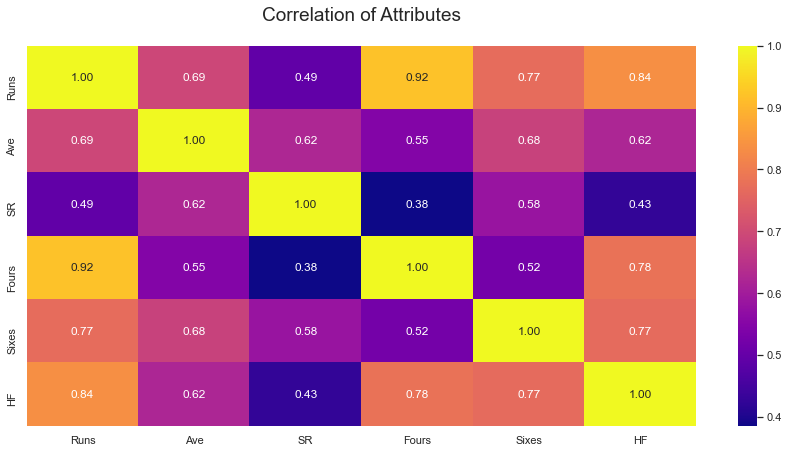

In [157]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df2.corr(), cmap='plasma',annot=True, fmt='.2f')

In [158]:
five_point=df2.describe().T
five_point[['min','25%','50%','75%','max']]

min      25%      50%       75%     max
Runs    2.00   98.000  196.500  330.7500  733.00
Ave     0.50   14.665   24.440   32.1950   81.33
SR     18.18  108.745  120.135  131.9975  164.10
Fours   0.00    6.250   16.000   28.0000   73.00
Sixes   0.00    3.000    6.000   10.0000   59.00
HF      0.00    0.000    0.500    2.0000    9.00

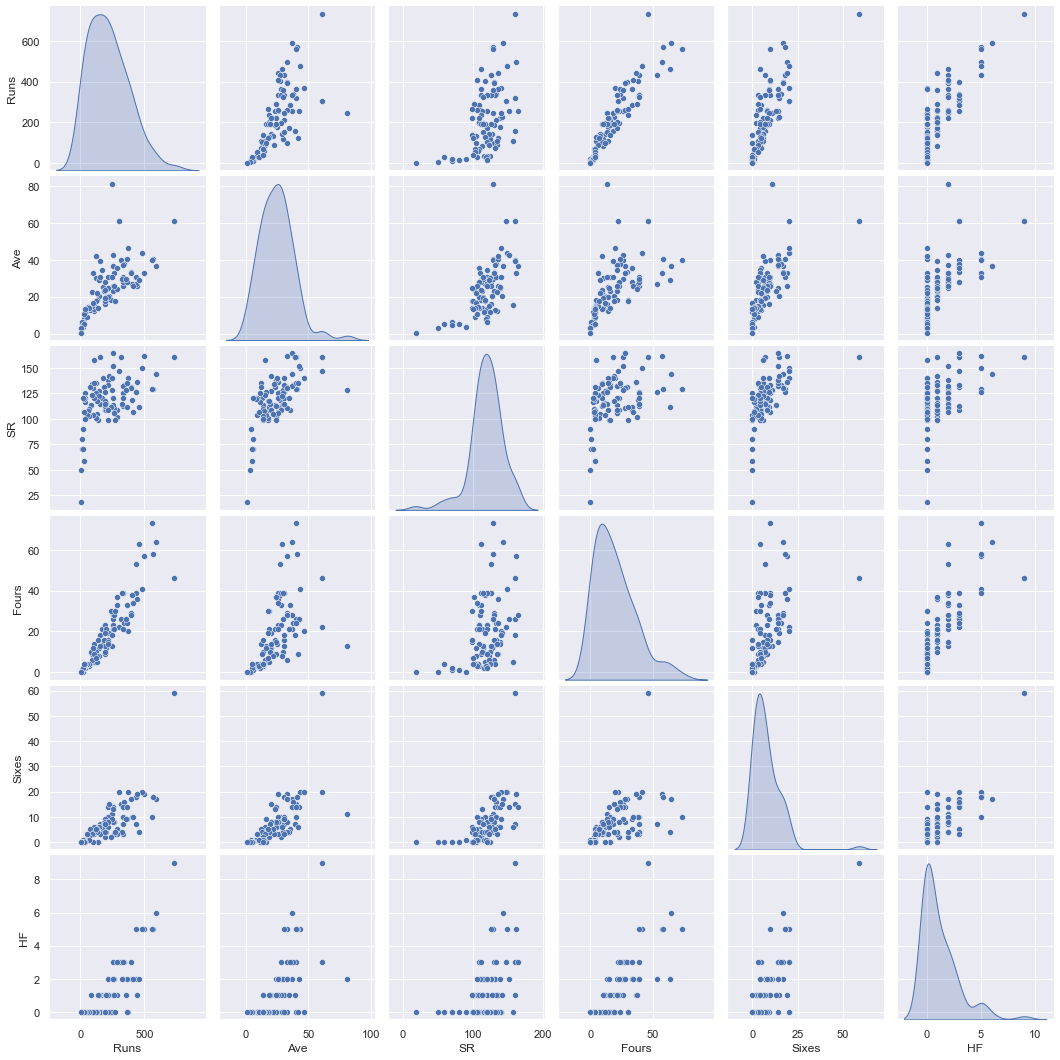

In [159]:
sns.pairplot(df2, diag_kind='kde')

#### From the distribution plot of the attributes, the attributes are either left or right skewed

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


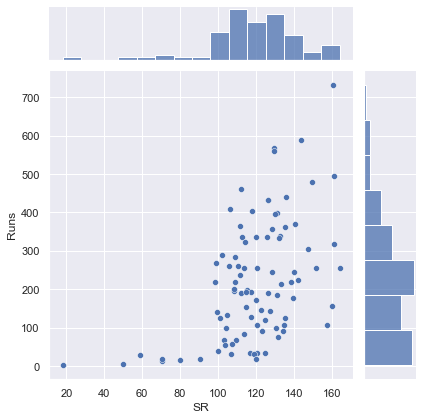

In [160]:
sns.jointplot(df2['SR'],df2['Runs'])

#### We can see a postive correlation between SR and Runs at the later half where SR> 100

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HF', ylabel='Runs'>

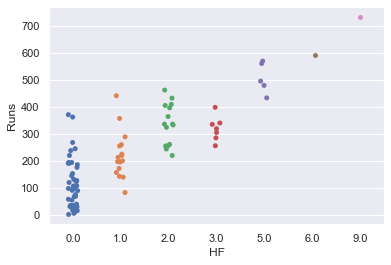

In [161]:
sns.stripplot(df['HF'],df['Runs'], jitter= True)

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HF', ylabel='Sixes'>

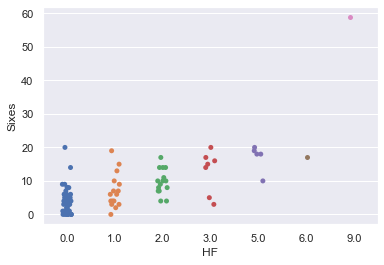

In [162]:
sns.stripplot(df['HF'],df['Sixes'], jitter= True)

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HF', ylabel='Fours'>

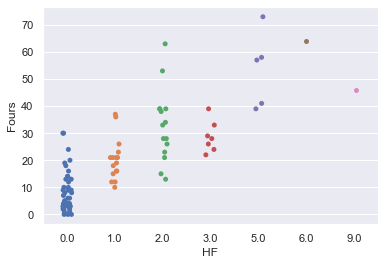

In [163]:
sns.stripplot(df['HF'],df['Fours'], jitter= True)

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fours', ylabel='Sixes'>

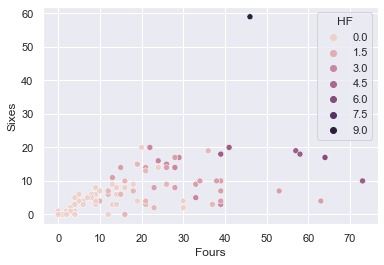

In [164]:
sns.scatterplot(df['Fours'],df['Sixes'], hue=df['HF'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Runs', ylabel='SR'>

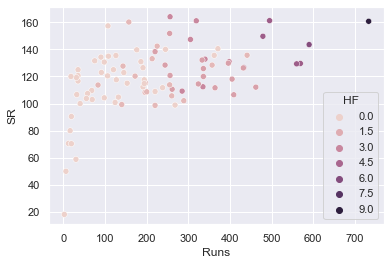

In [165]:
sns.scatterplot(df['Runs'],df['SR'], hue=df['HF'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Runs', ylabel='Ave'>

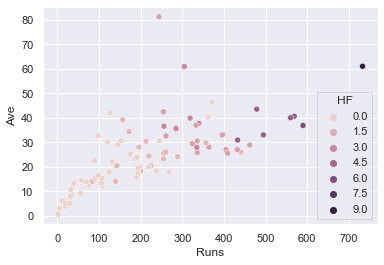

In [166]:
sns.scatterplot(df['Runs'],df['Ave'], hue=df['HF'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Ave'>

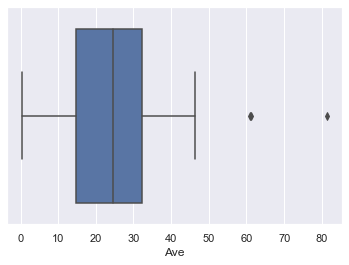

In [167]:
sns.boxplot(df['Ave'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Runs'>

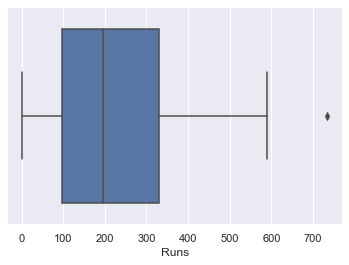

In [168]:
sns.boxplot(df['Runs'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sixes'>

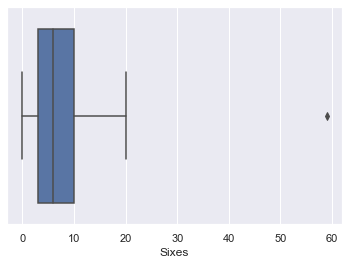

In [169]:
sns.boxplot(df['Sixes'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fours'>

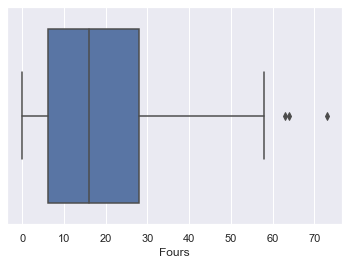

In [170]:
sns.boxplot(df['Fours'])

#### From the above boxplots, neglible number of outliers are present 

### One way to rank players is by grouping players with high scores and clustering does a good job of doing that

## Clustering and Ranking

In [171]:
df_scaled=df2.apply(zscore)

In [172]:
df_scaled.nunique()

Runs     79
Ave      84
SR       88
Fours    41
Sixes    21
HF        7
dtype: int64

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

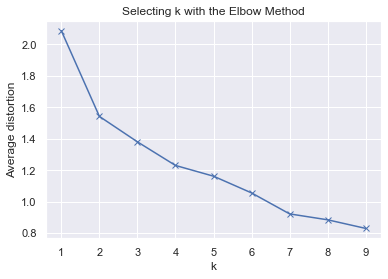

In [173]:
#Finding optimal no. of clusters

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


#### Elbow Point : 5

In [174]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')

In [175]:
model.fit(df_scaled)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [176]:
df['labels'] = model.labels_
df.head(10)

Name   Runs    Ave      SR  Fours  Sixes   HF  labels
0        CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0       3
1       G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0       4
2        V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0       4
3        CL White  479.0  43.54  149.68   41.0   20.0  5.0       4
4        S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0       4
5       AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0       4
6    KP Pietersen  305.0  61.00  147.34   22.0   20.0  3.0       2
7       RG Sharma  433.0  30.92  126.60   39.0   18.0  5.0       4
8  AB de Villiers  319.0  39.87  161.11   26.0   15.0  3.0       0
9       JP Duminy  244.0  81.33  128.42   13.0   11.0  2.0       2

In [177]:
dfcluster = df.groupby(['labels'])

#### The ninety players in the datasets are now split and ranked into five categories. Based on the mean scores, it'll be easier to know players belonging to which cluster have excellent performance.

In [178]:
df3= dfcluster.mean()
df3

Runs        Ave          SR      Fours      Sixes        HF
labels                                                                   
0       206.513514  23.904459  121.754730  18.378378   6.608108  0.837838
1        14.857143   4.054286   62.631429   1.142857   0.142857  0.000000
2       274.500000  71.165000  137.880000  17.500000  15.500000  2.500000
3       733.000000  61.080000  160.740000  46.000000  59.000000  9.000000
4       521.000000  37.495000  140.000000  55.333333  17.000000  5.166667

#### Creating a separate dataframe for each cluster 
- The players with label 3 are ranked first,
- Label 4 are ranked second
- Label 2 are ranked third

In [179]:
Rank1=df5[df5['labels']==3]
Rank2=df5[df5['labels']==4]
Rank3=df5[df5['labels']==2]
Rank4=df[df['labels']==0]
Rank5=df[df['labels']==1]

In [180]:
Z_average = linkage(df_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z_average , pdist(df_scaled))

print('cophenet index:', c)

cophenet index: 0.8483893216538161


# Part V

## 1.  Dimensionality reduction techniques implemented in pyhton include 
- PCA
- SVD (Singular Value decomposition) and 
- LDA, apart from dimensionality reduction, it can also be used in classification algorithm. 

## 2. Yes Dimensionality reduction can also be applied in multimedia data like images and videos. These techniques are widely used for image compression. 

### Example: Using PCA to compress images

(450, 300, 3)


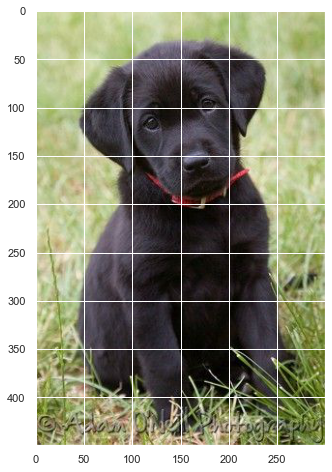

In [181]:
image_raw = imread("test.jpg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

(450, 300)
1.0


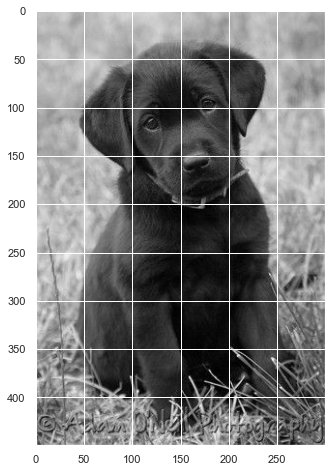

In [182]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

Number of components explaining 95% variance: 34


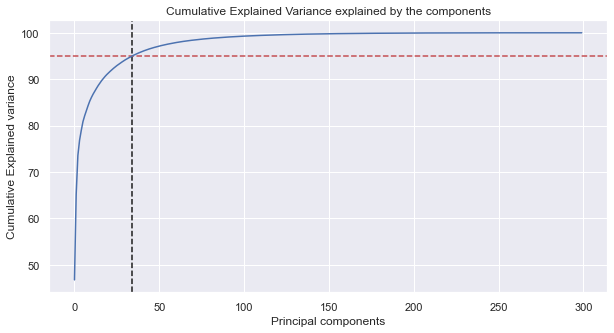

In [183]:
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))


plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

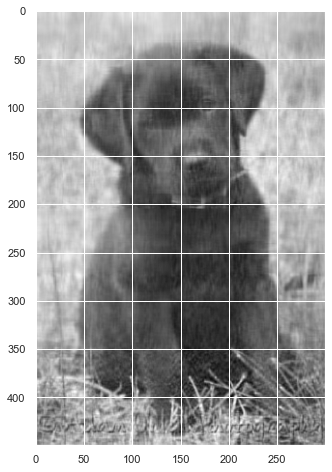

In [184]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)